# Getting the dataset:

In [ ]:
!unzip /content/BAU_HW_CAT_DOG_CLASSIFICATION.zip

Archive:  /content/BAU_HW_CAT_DOG_CLASSIFICATION.zip
replace __MACOSX/._BAU_HW_CAT_DOG_CLASSIFICATION? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#!pip install -U tensorflow
#!pip install -U tensorflow-datasets
#!pip install -U matplotlib

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [3]:

# implementing the data paths:
train_dir = '/content/BAU_HW_CAT_DOG_CLASSIFICATION/training_set'
test_dir = '/content/BAU_HW_CAT_DOG_CLASSIFICATION/test_set'

# storing the images and labels in lists:
x_train_cats = []
y_train_cats = []
x_train_dogs = []
y_train_dogs = []
x_test_cats = []
y_test_cats = []
x_test_dogs = []
y_test_dogs = []

# Looping over the training for the cats class:
for file in os.listdir(os.path.join(train_dir, 'cats')):
    # Skipping any hidden files:
    if file.startswith('.'):
        continue
    # Loading the image existed in the dataset
    image = cv2.imread(os.path.join(train_dir, 'cats', file))
    image = cv2.resize(image, (200, 200))
    image = image / 255.0  # normalizing the images
    # Adding the images and their lables  to the created empty lists:
    x_train_cats.append(image)
    y_train_cats.append(1)  # label for cat is 1

# Looping over the training for the Dogs class:
for file in os.listdir(os.path.join(train_dir, 'dogs')):
    # Skip hidden files
    if file.startswith('.'):
        continue
    # Load the image
    image = cv2.imread(os.path.join(train_dir, 'dogs', file))
    image = cv2.resize(image, (200, 200))
    image = image / 255.0  # normalize the image
    # Add the image and label to the lists
    x_train_dogs.append(image)
    y_train_dogs.append(0)  # label for dog is 0

# Loop through the test directory
for file in os.listdir(os.path.join(test_dir, 'cats')):
    # Load the image
    image = cv2.imread(os.path.join(test_dir, 'cats', file))
    image = cv2.resize(image, (200, 200))
    image = image / 255.0  # normalize the image
    # Add the image and label to the lists
    x_test_cats.append(image)
    y_test_cats.append(1)  # label for the cat class is 1

# Looping through the test directory
for file in os.listdir(os.path.join(test_dir, 'dogs')):
    # Load the image
    image = cv2.imread(os.path.join(test_dir, 'dogs', file))
    image = cv2.resize(image, (200, 200))
    image = image / 255.0  
    x_test_dogs.append(image)
    y_test_dogs.append(0)  # label for the dog class is 0

# Converting the lists into NumPy arrays to concatinate them:
x_train_cats = np.array(x_train_cats)
y_train_cats = np.array(y_train_cats)
x_train_dogs = np.array(x_train_dogs)
y_train_dogs = np.array(y_train_dogs)
x_test_cats = np.array(x_test_cats)
y_test_cats = np.array(y_test_cats)
x_test_dogs = np.array(x_test_dogs)
y_test_dogs = np.array(y_test_dogs)

# Concatenating the Numpy arrays:
x_train = np.concatenate((x_train_cats, x_train_dogs))
y_train = np.concatenate((y_train_cats, y_train_dogs))
x_test = np.concatenate((x_test_cats, x_test_dogs))
y_test = np.concatenate((y_test_cats, y_test_dogs))

# Shuffling the training data
indices = np.random.permutation(len(x_train))
x_train = x_train[indices]


# Splitting the training data into two sets for train and validation:

val_split = 0.2
val_idx = int(len(x_train) * val_split)
x_val = x_train[:val_idx]
y_val = y_train[:val_idx]
x_train = x_train[val_idx:]
y_train = y_train[val_idx:]

# Data Visualization:

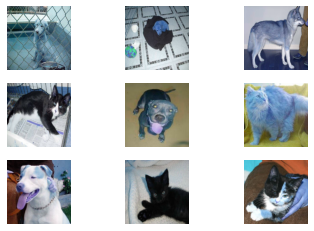

In [4]:
# visualizeing some examples from the training set:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()



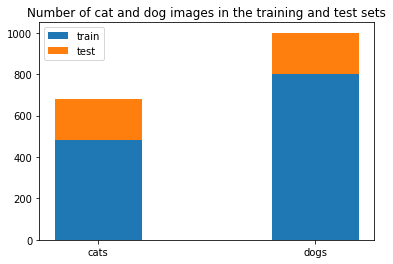

In [5]:
#Plotting the distribution of class labels in the training and test sets:

# Count the number of cat and dog images in the training and test sets
num_cats_train = np.sum(y_train == 1)
num_dogs_train = np.sum(y_train == 0)
num_cats_test = np.sum(y_test == 1)
num_dogs_test = np.sum(y_test == 0)

# Plot the distribution of class labels
plt.bar(['cats', 'dogs'], [num_cats_train, num_dogs_train], width=0.4, label='train')
plt.bar(['cats', 'dogs'], [num_cats_test, num_dogs_test], width=0.4, label='test', bottom=[num_cats_train, num_dogs_train])
plt.legend()
plt.title('Number of cat and dog images in the training and test sets')
plt.show()


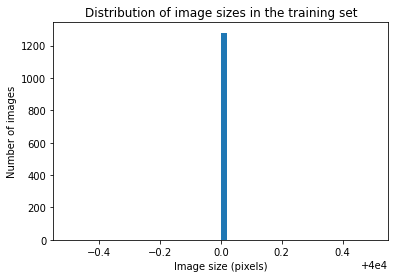

In [ ]:
#Plot the distribution of image sizes
# Get the size of each image
image_sizes = [image.shape[0] * image.shape[1] for image in x_train]

# Plot the distribution of image sizes
plt.hist(image_sizes, bins=50)
plt.xlabel('Image size (pixels)')
plt.ylabel('Number of images')
plt.title('Distribution of image sizes in the training set')
plt.show()


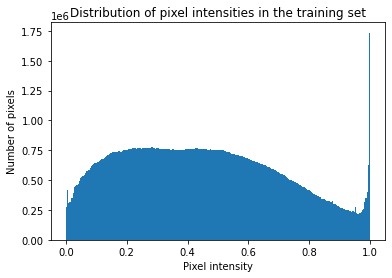

In [ ]:
# Plot the distribution of pixel intensities

# Flatten the images into 1D arrays
x_train_flat = [image.flatten() for image in x_train]

# Concatenate the arrays into a single array
x_train_flat = np.concatenate(x_train_flat)

# Plot the distribution of pixel intensities
plt.hist(x_train_flat, bins=256)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('Distribution of pixel intensities in the training set')
plt.show()


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1280, 200, 200, 3)
(1280,)
(400, 200, 200, 3)
(400,)


# Model 1

Epoch 1/30
16/16 [==============================] - 10s 119ms/step - loss: 1.1775 - accuracy: 0.5322 - val_loss: 0.6668 - val_accuracy: 0.6211
Epoch 2/30
16/16 [==============================] - 2s 98ms/step - loss: 0.6661 - accuracy: 0.6260 - val_loss: 0.6675 - val_accuracy: 0.6211
Epoch 3/30
16/16 [==============================] - 1s 87ms/step - loss: 0.6523 - accuracy: 0.6182 - val_loss: 0.6763 - val_accuracy: 0.6250
Epoch 4/30
16/16 [==============================] - 1s 86ms/step - loss: 0.6147 - accuracy: 0.6777 - val_loss: 0.6849 - val_accuracy: 0.6172
Epoch 5/30
16/16 [==============================] - 1s 87ms/step - loss: 0.5108 - accuracy: 0.7441 - val_loss: 0.7525 - val_accuracy: 0.5469
Epoch 6/30
16/16 [==============================] - 1s 88ms/step - loss: 0.4890 - accuracy: 0.8018 - val_loss: 0.7198 - val_accuracy: 0.5039
Epoch 7/30
16/16 [==============================] - 1s 87ms/step - loss: 0.4314 - accuracy: 0.8418 - val_loss: 1.0040 - val_accuracy: 0.6016
Epoch 8/30


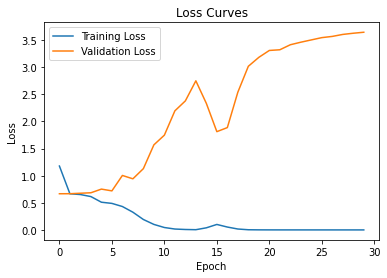

8/8 [==============================] - 0s 21ms/step - loss: 3.6441 - accuracy: 0.4961
Epoch 1/30
16/16 [==============================] - 2s 107ms/step - loss: 0.6766 - accuracy: 0.8105 - val_loss: 0.4931 - val_accuracy: 0.8320
Epoch 2/30
16/16 [==============================] - 1s 86ms/step - loss: 0.4218 - accuracy: 0.8262 - val_loss: 0.3798 - val_accuracy: 0.8828
Epoch 3/30
16/16 [==============================] - 2s 96ms/step - loss: 0.2635 - accuracy: 0.9033 - val_loss: 0.3151 - val_accuracy: 0.8594
Epoch 4/30
16/16 [==============================] - 2s 98ms/step - loss: 0.1471 - accuracy: 0.9482 - val_loss: 0.2589 - val_accuracy: 0.9062
Epoch 5/30
16/16 [==============================] - 1s 88ms/step - loss: 0.0813 - accuracy: 0.9834 - val_loss: 0.3191 - val_accuracy: 0.8789
Epoch 6/30
16/16 [==============================] - 2s 97ms/step - loss: 0.0424 - accuracy: 0.9883 - val_loss: 0.3829 - val_accuracy: 0.8750
Epoch 7/30
16/16 [==============================] - 2s 98ms/step - 

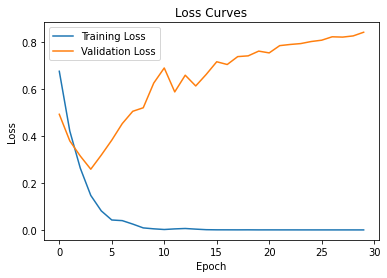

8/8 [==============================] - 0s 21ms/step - loss: 0.8430 - accuracy: 0.8242
Epoch 1/30
16/16 [==============================] - 2s 97ms/step - loss: 0.1646 - accuracy: 0.9482 - val_loss: 0.0861 - val_accuracy: 0.9883
Epoch 2/30
16/16 [==============================] - 1s 88ms/step - loss: 0.0570 - accuracy: 0.9814 - val_loss: 0.0573 - val_accuracy: 0.9805
Epoch 3/30
16/16 [==============================] - 2s 98ms/step - loss: 0.0438 - accuracy: 0.9873 - val_loss: 0.2016 - val_accuracy: 0.8984
Epoch 4/30
16/16 [==============================] - 1s 87ms/step - loss: 0.0341 - accuracy: 0.9902 - val_loss: 0.1047 - val_accuracy: 0.9648
Epoch 5/30
16/16 [==============================] - 1s 87ms/step - loss: 0.0221 - accuracy: 0.9902 - val_loss: 0.1283 - val_accuracy: 0.9531
Epoch 6/30
16/16 [==============================] - 1s 87ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.0628 - val_accuracy: 0.9766
Epoch 7/30
16/16 [==============================] - 1s 88ms/step - l

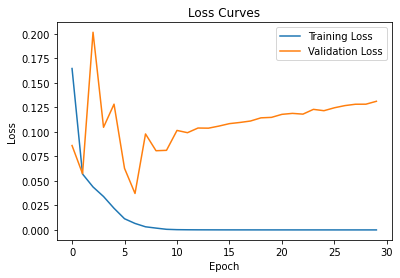

8/8 [==============================] - 0s 23ms/step - loss: 0.1312 - accuracy: 0.9531
Epoch 1/30
16/16 [==============================] - 2s 97ms/step - loss: 0.0431 - accuracy: 0.9883 - val_loss: 0.0169 - val_accuracy: 0.9961
Epoch 2/30
16/16 [==============================] - 1s 87ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0103 - val_accuracy: 0.9961
Epoch 3/30
16/16 [==============================] - 1s 88ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/30
16/16 [==============================] - 1s 87ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/30
16/16 [==============================] - 1s 88ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9961
Epoch 6/30
16/16 [==============================] - 1s 89ms/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9961
Epoch 7/30
16/16 [==============================] - 1s 87ms/step - l

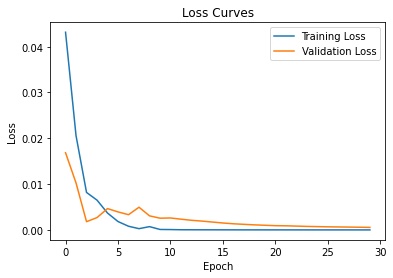

8/8 [==============================] - 0s 22ms/step - loss: 5.6265e-04 - accuracy: 1.0000
Epoch 1/30
16/16 [==============================] - 2s 97ms/step - loss: 1.2525e-04 - accuracy: 1.0000 - val_loss: 2.1994e-05 - val_accuracy: 1.0000
Epoch 2/30
16/16 [==============================] - 1s 89ms/step - loss: 8.0906e-05 - accuracy: 1.0000 - val_loss: 1.6268e-05 - val_accuracy: 1.0000
Epoch 3/30
16/16 [==============================] - 1s 87ms/step - loss: 1.8432e-05 - accuracy: 1.0000 - val_loss: 8.7396e-06 - val_accuracy: 1.0000
Epoch 4/30
16/16 [==============================] - 1s 87ms/step - loss: 1.3472e-05 - accuracy: 1.0000 - val_loss: 8.0054e-06 - val_accuracy: 1.0000
Epoch 5/30
16/16 [==============================] - 1s 89ms/step - loss: 1.2472e-05 - accuracy: 1.0000 - val_loss: 7.7697e-06 - val_accuracy: 1.0000
Epoch 6/30
16/16 [==============================] - 1s 87ms/step - loss: 1.1753e-05 - accuracy: 1.0000 - val_loss: 7.6452e-06 - val_accuracy: 1.0000
Epoch 7/30
16/16

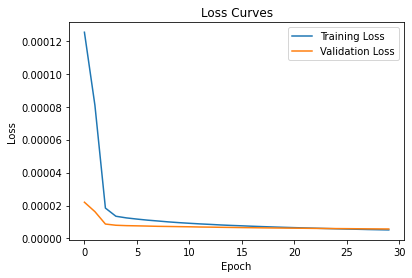

8/8 [==============================] - 0s 22ms/step - loss: 5.7429e-06 - accuracy: 1.0000
Mean accuracy: 0.8546875
40/40 [==============================] - 1s 23ms/step - loss: 5.1982e-06 - accuracy: 1.0000
Training accuracy: 1.0
13/13 [==============================] - 0s 30ms/step - loss: 6.1276 - accuracy: 0.5025
Testing accuracy: 0.5024999976158142


In [ ]:
# Creating the first model
model = models.Sequential()

# Adding the required convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output and add the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Adding the output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Import the KFold class from sklearn
from sklearn.model_selection import KFold

# Create a KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)

# Initialize a list to store the accuracies for each fold
accuracies = []

# Loop through the folds
for train_index, test_index in kfold.split(x_train):
    # Get the training and test data for this fold
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Train the model on the training data
    # Train the model on the training data
    history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=64, validation_data=(x_test_fold, y_test_fold))

    # Evaluating the model on the test data
    test_loss, test_acc = model.evaluate(x_test_fold, y_test_fold)
    print('Fold test accuracy:', test_acc)

    # Plotting the training and validation loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

    # Evaluate the model on the test data
    _, accuracy = model.evaluate(x_test_fold, y_test_fold)

    # Store the accuracy
    accuracies.append(accuracy)

# Calculate the mean accuracy across all the folds
mean_accuracy = np.mean(accuracies)
print('Mean accuracy:', mean_accuracy)

# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc)

#Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Testing accuracy:', test_acc)


### Model1 Visualization: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               1

1/1 [==============================] - 0s 134ms/step


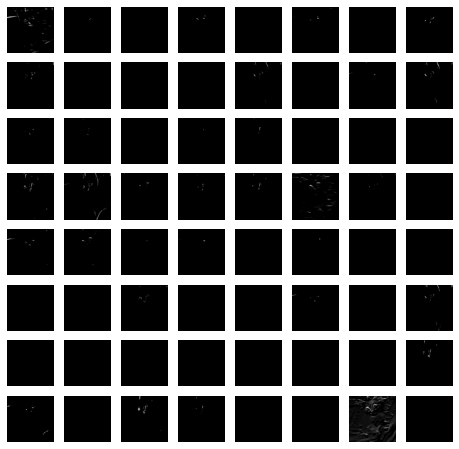

In [ ]:
# define a function to visualize the feature maps of a convolutional layer
def visualize_feature_maps(model, layer_name, input_image):
  # get the feature maps of the given layer
  feature_maps = model.get_layer(layer_name).output

  # create a model that outputs the feature maps
  feature_map_model = models.Model(inputs=model.inputs, outputs=feature_maps)

  # get the feature maps of the input image
  feature_maps = feature_map_model.predict(input_image)

  # plot the feature maps
  plt.figure(figsize=(8, 8))
  for i in range(feature_maps.shape[-1]):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature_maps[0,:,:,i], cmap='gray')
    plt.axis('off')
  plt.show()

# visualize the feature maps of the first convolutional layer of the model
visualize_feature_maps(model, 'conv2d_1', x_train[0:1])


13/13 [==============================] - 0s 18ms/step


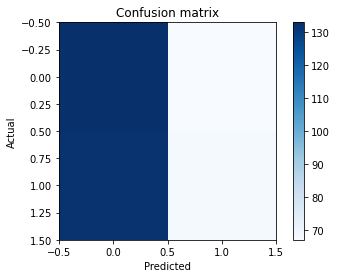

In [ ]:
from sklearn.metrics import confusion_matrix

# get the predicted labels for the test set
y_pred = model.predict(x_test).round()

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()


# Model 2:

Epoch 1/30
16/16 [==============================] - 3s 135ms/step - loss: 0.6696 - accuracy: 0.6045 - val_loss: 0.6638 - val_accuracy: 0.6211
Epoch 2/30
16/16 [==============================] - 2s 116ms/step - loss: 0.6658 - accuracy: 0.6260 - val_loss: 0.6641 - val_accuracy: 0.6211
Epoch 3/30
16/16 [==============================] - 2s 114ms/step - loss: 0.6624 - accuracy: 0.6260 - val_loss: 0.6638 - val_accuracy: 0.6211
Epoch 4/30
16/16 [==============================] - 2s 105ms/step - loss: 0.6694 - accuracy: 0.6260 - val_loss: 0.6734 - val_accuracy: 0.6211
Epoch 5/30
16/16 [==============================] - 2s 105ms/step - loss: 0.6631 - accuracy: 0.6260 - val_loss: 0.6672 - val_accuracy: 0.6211
Epoch 6/30
16/16 [==============================] - 2s 104ms/step - loss: 0.6658 - accuracy: 0.6260 - val_loss: 0.6666 - val_accuracy: 0.6211
Epoch 7/30
16/16 [==============================] - 2s 114ms/step - loss: 0.6647 - accuracy: 0.6260 - val_loss: 0.6660 - val_accuracy: 0.6211
Epoch 

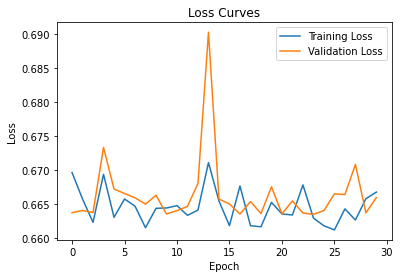

8/8 [==============================] - 0s 21ms/step - loss: 0.6660 - accuracy: 0.6211
Epoch 1/30
16/16 [==============================] - 2s 124ms/step - loss: 0.6684 - accuracy: 0.6152 - val_loss: 0.6396 - val_accuracy: 0.6641
Epoch 2/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6691 - accuracy: 0.6152 - val_loss: 0.6398 - val_accuracy: 0.6641
Epoch 3/30
16/16 [==============================] - 2s 114ms/step - loss: 0.6700 - accuracy: 0.6152 - val_loss: 0.6503 - val_accuracy: 0.6641
Epoch 4/30
16/16 [==============================] - 2s 116ms/step - loss: 0.6657 - accuracy: 0.6152 - val_loss: 0.6390 - val_accuracy: 0.6641
Epoch 5/30
16/16 [==============================] - 2s 116ms/step - loss: 0.6702 - accuracy: 0.6152 - val_loss: 0.6423 - val_accuracy: 0.6641
Epoch 6/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6686 - accuracy: 0.6152 - val_loss: 0.6480 - val_accuracy: 0.6641
Epoch 7/30
16/16 [==============================] - 2s 115ms/s

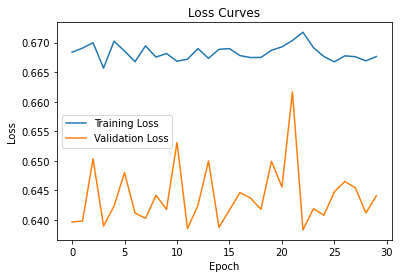

8/8 [==============================] - 0s 23ms/step - loss: 0.6441 - accuracy: 0.6641
Epoch 1/30
16/16 [==============================] - 2s 142ms/step - loss: 0.6608 - accuracy: 0.6348 - val_loss: 0.6791 - val_accuracy: 0.5859
Epoch 2/30
16/16 [==============================] - 2s 130ms/step - loss: 0.6578 - accuracy: 0.6348 - val_loss: 0.6831 - val_accuracy: 0.5859
Epoch 3/30
16/16 [==============================] - 2s 122ms/step - loss: 0.6599 - accuracy: 0.6348 - val_loss: 0.6908 - val_accuracy: 0.5859
Epoch 4/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6571 - accuracy: 0.6348 - val_loss: 0.6824 - val_accuracy: 0.5859
Epoch 5/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6572 - accuracy: 0.6348 - val_loss: 0.6808 - val_accuracy: 0.5859
Epoch 6/30
16/16 [==============================] - 2s 116ms/step - loss: 0.6572 - accuracy: 0.6348 - val_loss: 0.6823 - val_accuracy: 0.5859
Epoch 7/30
16/16 [==============================] - 2s 105ms/s

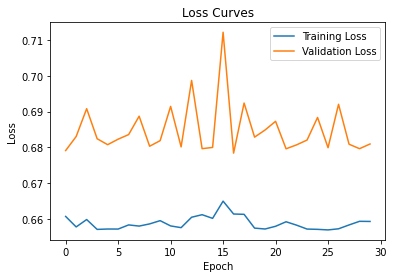

8/8 [==============================] - 0s 21ms/step - loss: 0.6810 - accuracy: 0.5859
Epoch 1/30
16/16 [==============================] - 2s 119ms/step - loss: 0.6635 - accuracy: 0.6240 - val_loss: 0.6596 - val_accuracy: 0.6289
Epoch 2/30
16/16 [==============================] - 2s 106ms/step - loss: 0.6662 - accuracy: 0.6240 - val_loss: 0.6625 - val_accuracy: 0.6289
Epoch 3/30
16/16 [==============================] - 2s 117ms/step - loss: 0.6626 - accuracy: 0.6240 - val_loss: 0.6607 - val_accuracy: 0.6289
Epoch 4/30
16/16 [==============================] - 2s 107ms/step - loss: 0.6627 - accuracy: 0.6240 - val_loss: 0.6622 - val_accuracy: 0.6289
Epoch 5/30
16/16 [==============================] - 2s 116ms/step - loss: 0.6635 - accuracy: 0.6240 - val_loss: 0.6611 - val_accuracy: 0.6289
Epoch 6/30
16/16 [==============================] - 2s 107ms/step - loss: 0.6642 - accuracy: 0.6240 - val_loss: 0.6596 - val_accuracy: 0.6289
Epoch 7/30
16/16 [==============================] - 2s 115ms/s

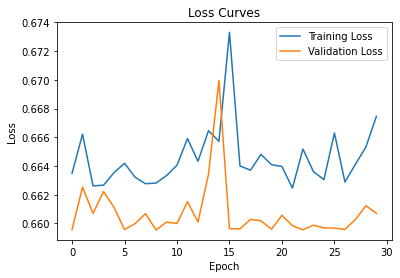

8/8 [==============================] - 0s 24ms/step - loss: 0.6607 - accuracy: 0.6289
Epoch 1/30
16/16 [==============================] - 2s 124ms/step - loss: 0.6622 - accuracy: 0.6250 - val_loss: 0.6618 - val_accuracy: 0.6250
Epoch 2/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6626 - accuracy: 0.6250 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 3/30
16/16 [==============================] - 2s 106ms/step - loss: 0.6622 - accuracy: 0.6250 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 4/30
16/16 [==============================] - 2s 106ms/step - loss: 0.6630 - accuracy: 0.6250 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 5/30
16/16 [==============================] - 2s 106ms/step - loss: 0.6623 - accuracy: 0.6250 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 6/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6622 - accuracy: 0.6250 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 7/30
16/16 [==============================] - 2s 116ms/s

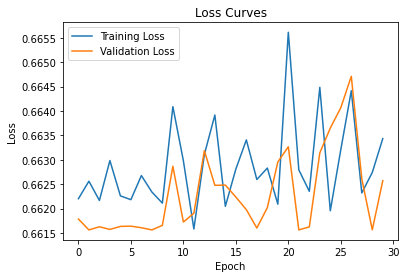

8/8 [==============================] - 0s 24ms/step - loss: 0.6626 - accuracy: 0.6250
Mean accuracy: 0.625
40/40 [==============================] - 1s 23ms/step - loss: 0.6626 - accuracy: 0.6250
Training accuracy: 0.625
13/13 [==============================] - 1s 49ms/step - loss: 0.7381 - accuracy: 0.5000
Testing accuracy: 0.5


In [7]:
# Create Model 2: 
model = models.Sequential()

# Adding the required convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='sigmoid')) 
model.add(layers.MaxPooling2D((2, 2))) 



# Flatten the output and add the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))

# Add the output layer
model.add(layers.Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Import the KFold class from sklearn
from sklearn.model_selection import KFold

# Create a KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)

# Initialize a list to store the accuracies for each fold
accuracies = []

# Loop through the folds
for train_index, test_index in kfold.split(x_train):
    # Get the training and test data for this fold
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Train the model on the training data
    # Train the model on the training data
    history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=64, validation_data=(x_test_fold, y_test_fold))

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test_fold, y_test_fold)
    print('Fold test accuracy:', test_acc)

    # Plot the training and validation loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

    # Evaluate the model on the test data
    _, accuracy = model.evaluate(x_test_fold, y_test_fold)

    # Store the accuracy
    accuracies.append(accuracy)

# Calculate the mean accuracy across all the folds
mean_accuracy = np.mean(accuracies)
print('Mean accuracy:', mean_accuracy)

# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc)

#Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Testing accuracy:', test_acc)


###  Model2 Visualization: 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 128)     

13/13 [==============================] - 0s 22ms/step


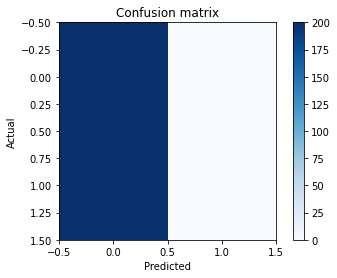

In [10]:
from sklearn.metrics import confusion_matrix

# get the predicted labels for the test set
y_pred = model.predict(x_test).round()

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

# Model 3: 

Epoch 1/30
16/16 [==============================] - 3s 133ms/step - loss: 0.6805 - accuracy: 0.6143 - val_loss: 0.6676 - val_accuracy: 0.6328
Epoch 2/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6718 - accuracy: 0.6230 - val_loss: 0.6655 - val_accuracy: 0.6328
Epoch 3/30
16/16 [==============================] - 2s 105ms/step - loss: 0.6697 - accuracy: 0.6230 - val_loss: 0.6664 - val_accuracy: 0.6328
Epoch 4/30
16/16 [==============================] - 2s 107ms/step - loss: 0.6708 - accuracy: 0.6230 - val_loss: 0.6603 - val_accuracy: 0.6328
Epoch 5/30
16/16 [==============================] - 2s 105ms/step - loss: 0.6651 - accuracy: 0.6230 - val_loss: 0.6601 - val_accuracy: 0.6328
Epoch 6/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6644 - accuracy: 0.6230 - val_loss: 0.6574 - val_accuracy: 0.6328
Epoch 7/30
16/16 [==============================] - 2s 115ms/step - loss: 0.6632 - accuracy: 0.6230 - val_loss: 0.6572 - val_accuracy: 0.6328
Epoch 

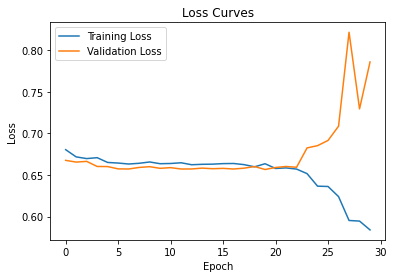

8/8 [==============================] - 0s 26ms/step - loss: 0.7860 - accuracy: 0.5547
Epoch 1/30
16/16 [==============================] - 2s 122ms/step - loss: 0.6086 - accuracy: 0.6826 - val_loss: 0.5752 - val_accuracy: 0.7031
Epoch 2/30
16/16 [==============================] - 2s 114ms/step - loss: 0.5353 - accuracy: 0.7354 - val_loss: 0.5543 - val_accuracy: 0.6875
Epoch 3/30
16/16 [==============================] - 2s 106ms/step - loss: 0.4624 - accuracy: 0.7715 - val_loss: 0.5758 - val_accuracy: 0.6992
Epoch 4/30
16/16 [==============================] - 2s 115ms/step - loss: 0.3827 - accuracy: 0.8115 - val_loss: 0.6064 - val_accuracy: 0.7070
Epoch 5/30
16/16 [==============================] - 2s 115ms/step - loss: 0.3010 - accuracy: 0.8662 - val_loss: 0.8086 - val_accuracy: 0.7070
Epoch 6/30
16/16 [==============================] - 2s 114ms/step - loss: 0.2528 - accuracy: 0.8887 - val_loss: 0.8104 - val_accuracy: 0.6719
Epoch 7/30
16/16 [==============================] - 2s 114ms/s

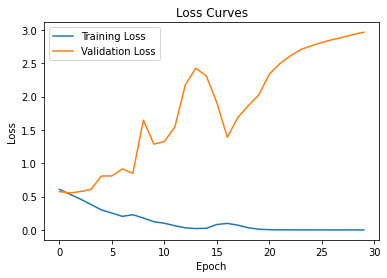

8/8 [==============================] - 0s 26ms/step - loss: 2.9658 - accuracy: 0.6680
Epoch 1/30
16/16 [==============================] - 2s 116ms/step - loss: 0.5292 - accuracy: 0.8545 - val_loss: 0.3330 - val_accuracy: 0.9297
Epoch 2/30
16/16 [==============================] - 2s 114ms/step - loss: 0.3083 - accuracy: 0.8916 - val_loss: 0.1236 - val_accuracy: 0.9609
Epoch 3/30
16/16 [==============================] - 2s 105ms/step - loss: 0.1197 - accuracy: 0.9561 - val_loss: 0.0790 - val_accuracy: 0.9727
Epoch 4/30
16/16 [==============================] - 2s 114ms/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0840 - val_accuracy: 0.9766
Epoch 5/30
16/16 [==============================] - 2s 107ms/step - loss: 0.0126 - accuracy: 0.9990 - val_loss: 0.0981 - val_accuracy: 0.9570
Epoch 6/30
16/16 [==============================] - 2s 114ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0638 - val_accuracy: 0.9727
Epoch 7/30
16/16 [==============================] - 2s 107ms/s

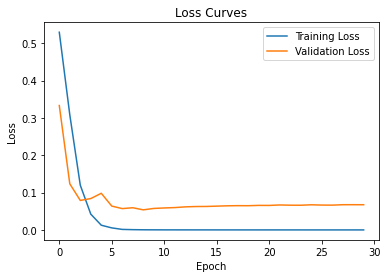

8/8 [==============================] - 0s 23ms/step - loss: 0.0674 - accuracy: 0.9688
Epoch 1/30
16/16 [==============================] - 2s 123ms/step - loss: 0.2847 - accuracy: 0.9209 - val_loss: 0.1782 - val_accuracy: 0.9492
Epoch 2/30
16/16 [==============================] - 2s 107ms/step - loss: 0.2055 - accuracy: 0.9189 - val_loss: 0.1128 - val_accuracy: 0.9805
Epoch 3/30
16/16 [==============================] - 2s 115ms/step - loss: 0.0663 - accuracy: 0.9775 - val_loss: 0.0675 - val_accuracy: 0.9766
Epoch 4/30
16/16 [==============================] - 2s 116ms/step - loss: 0.0132 - accuracy: 0.9971 - val_loss: 0.0677 - val_accuracy: 0.9766
Epoch 5/30
16/16 [==============================] - 2s 115ms/step - loss: 0.0199 - accuracy: 0.9951 - val_loss: 0.0786 - val_accuracy: 0.9805
Epoch 6/30
16/16 [==============================] - 2s 107ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.1183 - val_accuracy: 0.9609
Epoch 7/30
16/16 [==============================] - 2s 116ms/s

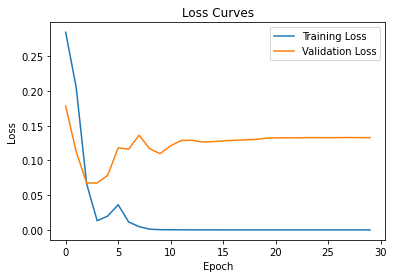

8/8 [==============================] - 0s 27ms/step - loss: 0.1329 - accuracy: 0.9609
Epoch 1/30
16/16 [==============================] - 2s 116ms/step - loss: 0.0672 - accuracy: 0.9766 - val_loss: 0.0969 - val_accuracy: 0.9727
Epoch 2/30
16/16 [==============================] - 2s 115ms/step - loss: 0.0784 - accuracy: 0.9727 - val_loss: 0.0416 - val_accuracy: 0.9844
Epoch 3/30
16/16 [==============================] - 2s 105ms/step - loss: 0.1477 - accuracy: 0.9658 - val_loss: 0.1937 - val_accuracy: 0.9297
Epoch 4/30
16/16 [==============================] - 2s 106ms/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0597 - val_accuracy: 0.9883
Epoch 5/30
16/16 [==============================] - 2s 106ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0656 - val_accuracy: 0.9727
Epoch 6/30
16/16 [==============================] - 2s 115ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9766
Epoch 7/30
16/16 [==============================] - 2s 116ms/s

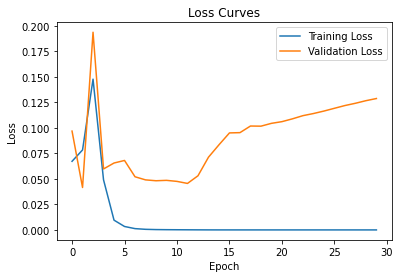

8/8 [==============================] - 0s 27ms/step - loss: 0.1288 - accuracy: 0.9648
Mean accuracy: 0.8234375
40/40 [==============================] - 1s 25ms/step - loss: 0.0258 - accuracy: 0.9930
Training accuracy: 0.992968738079071
13/13 [==============================] - 0s 24ms/step - loss: 8.5179 - accuracy: 0.4650
Testing accuracy: 0.4650000035762787


In [11]:
# Creating the third model:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

# Flatten the output and add the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Add the output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Import the KFold class from sklearn
from sklearn.model_selection import KFold

# Create a KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)

# Initialize a list to store the accuracies for each fold
accuracies = []

# Loop through the folds
for train_index, test_index in kfold.split(x_train):
    # Get the training and test data for this fold
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Train the model on the training data
    # Train the model on the training data
    history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=64, validation_data=(x_test_fold, y_test_fold))

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test_fold, y_test_fold)
    print('Fold test accuracy:', test_acc)

    # Plot the training and validation loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

    # Evaluate the model on the test data
    _, accuracy = model.evaluate(x_test_fold, y_test_fold)

    # Store the accuracy
    accuracies.append(accuracy)

# Calculate the mean accuracy across all the folds
mean_accuracy = np.mean(accuracies)
print('Mean accuracy:', mean_accuracy)

# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc)

#Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Testing accuracy:', test_acc)


### Model 3 Visualization: 

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 128)     

13/13 [==============================] - 0s 24ms/step


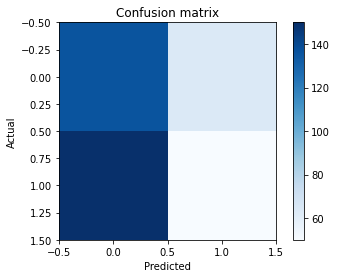

In [13]:
from sklearn.metrics import confusion_matrix

# get the predicted labels for the test set
y_pred = model.predict(x_test).round()

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(x_test_fold, y_test_fold)
print('Fold test accuracy:', test_acc)

8/8 [==============================] - 0s 28ms/step - loss: 0.1288 - accuracy: 0.9648
Fold test accuracy: 0.96484375


In [15]:
mean_accuracy = np.mean(accuracies)
print('Mean accuracy:', mean_accuracy)


Mean accuracy: 0.8234375


In [ ]:
# Saving this model for the api:

pertained = model.save("pertained_model.h5")




# Model: 4

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/30
16/16 [==============================] - 21s 656ms/step - loss: 3.4709 - accuracy: 0.5840 - val_loss: 0.6928 - val_accuracy: 0.6055
Epoch 2/30
16/16 [==============================] - 10s 627ms/step - loss: 0.6655 - accuracy: 0.6328 - val_loss: 0.6921 - val_accuracy: 0.6055
Epoch 3/30
16/16 [==============================] - 10s 625ms/step - loss: 0.5626 - accuracy: 0.6406 - val_loss: 0.6878 - val_accuracy: 0.6055
Epoch 4/30
16/16 [==============================] - 10s 628ms/step - loss: 0.4350 - accuracy: 0.7373 - val_loss: 1.1221 - val_accuracy: 0.6055
Epoch 5/30
16/16 [==============================] - 9s 589ms/step - loss: 0.2381 - accuracy: 0.9062 - val_loss: 0.6986 - val_accuracy: 0.4648
Epoch 6/30
16/16 [==============================] - 10s 633ms/step - loss: 0.1370 - accuracy: 0.9404 - val_loss: 1.3628 - val_accuracy: 0.6055
Epoch 7/30
16/16 [==============================] - 10s 635ms/step - loss: 0.1

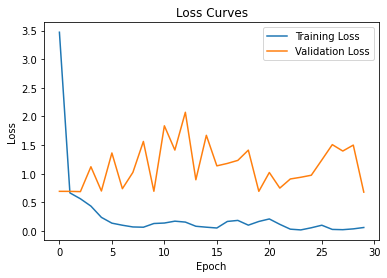

8/8 [==============================] - 1s 94ms/step - loss: 0.6787 - accuracy: 0.6055
Epoch 1/30
16/16 [==============================] - 10s 615ms/step - loss: 0.4453 - accuracy: 0.8398 - val_loss: 0.6962 - val_accuracy: 0.4258
Epoch 2/30
16/16 [==============================] - 10s 646ms/step - loss: 0.1850 - accuracy: 0.9316 - val_loss: 0.6880 - val_accuracy: 0.6094
Epoch 3/30
16/16 [==============================] - 10s 647ms/step - loss: 0.1988 - accuracy: 0.9512 - val_loss: 0.6550 - val_accuracy: 0.6406
Epoch 4/30
16/16 [==============================] - 10s 607ms/step - loss: 0.2042 - accuracy: 0.9160 - val_loss: 0.6751 - val_accuracy: 0.6289
Epoch 5/30
16/16 [==============================] - 10s 648ms/step - loss: 0.3766 - accuracy: 0.8350 - val_loss: 0.6880 - val_accuracy: 0.6406
Epoch 6/30
16/16 [==============================] - 10s 648ms/step - loss: 0.2458 - accuracy: 0.9062 - val_loss: 0.6827 - val_accuracy: 0.6406
Epoch 7/30
16/16 [==============================] - 10s 

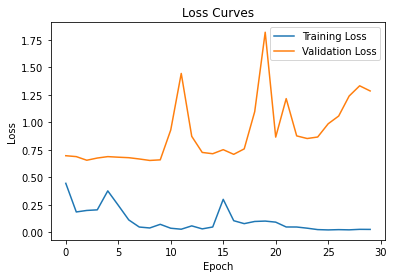

8/8 [==============================] - 1s 95ms/step - loss: 1.2848 - accuracy: 0.6484
Epoch 1/30
16/16 [==============================] - 11s 662ms/step - loss: 0.4485 - accuracy: 0.8643 - val_loss: 0.7355 - val_accuracy: 0.7227
Epoch 2/30
16/16 [==============================] - 10s 654ms/step - loss: 0.1813 - accuracy: 0.9248 - val_loss: 0.6617 - val_accuracy: 0.7305
Epoch 3/30
16/16 [==============================] - 10s 612ms/step - loss: 0.0409 - accuracy: 0.9854 - val_loss: 0.9357 - val_accuracy: 0.7656
Epoch 4/30
16/16 [==============================] - 10s 654ms/step - loss: 0.0259 - accuracy: 0.9893 - val_loss: 0.8419 - val_accuracy: 0.7891
Epoch 5/30
16/16 [==============================] - 10s 616ms/step - loss: 0.0352 - accuracy: 0.9854 - val_loss: 0.7505 - val_accuracy: 0.8320
Epoch 6/30
16/16 [==============================] - 10s 653ms/step - loss: 0.0341 - accuracy: 0.9844 - val_loss: 0.6175 - val_accuracy: 0.7969
Epoch 7/30
16/16 [==============================] - 10s 

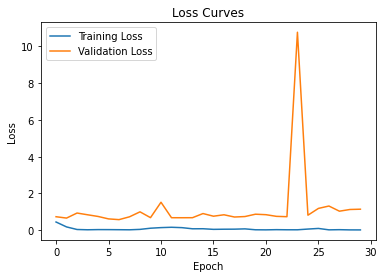

8/8 [==============================] - 1s 96ms/step - loss: 1.1445 - accuracy: 0.7461
Epoch 1/30
16/16 [==============================] - 10s 626ms/step - loss: 0.2545 - accuracy: 0.9111 - val_loss: 0.2113 - val_accuracy: 0.9102
Epoch 2/30
16/16 [==============================] - 10s 655ms/step - loss: 0.1405 - accuracy: 0.9482 - val_loss: 0.1355 - val_accuracy: 0.9492
Epoch 3/30
16/16 [==============================] - 10s 655ms/step - loss: 0.0471 - accuracy: 0.9805 - val_loss: 0.4225 - val_accuracy: 0.9375
Epoch 4/30
16/16 [==============================] - 10s 618ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.5800 - val_accuracy: 0.8555
Epoch 5/30
16/16 [==============================] - 10s 617ms/step - loss: 0.0880 - accuracy: 0.9883 - val_loss: 0.1200 - val_accuracy: 0.9570
Epoch 6/30
16/16 [==============================] - 10s 655ms/step - loss: 0.0373 - accuracy: 0.9854 - val_loss: 0.4556 - val_accuracy: 0.8516
Epoch 7/30
16/16 [==============================] - 10s 

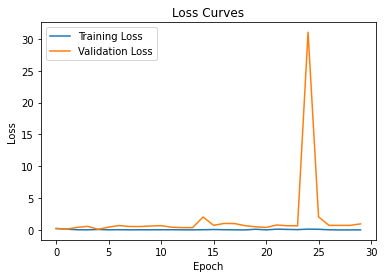

8/8 [==============================] - 1s 94ms/step - loss: 0.9670 - accuracy: 0.7383
Epoch 1/30
16/16 [==============================] - 10s 616ms/step - loss: 0.2070 - accuracy: 0.9434 - val_loss: 0.3080 - val_accuracy: 0.8906
Epoch 2/30
16/16 [==============================] - 10s 648ms/step - loss: 0.1193 - accuracy: 0.9502 - val_loss: 0.9130 - val_accuracy: 0.6250
Epoch 3/30
16/16 [==============================] - 10s 612ms/step - loss: 0.0651 - accuracy: 0.9766 - val_loss: 0.8948 - val_accuracy: 0.6406
Epoch 4/30
16/16 [==============================] - 10s 612ms/step - loss: 0.0535 - accuracy: 0.9775 - val_loss: 2.4109 - val_accuracy: 0.6445
Epoch 5/30
16/16 [==============================] - 10s 613ms/step - loss: 0.0484 - accuracy: 0.9775 - val_loss: 0.2736 - val_accuracy: 0.9141
Epoch 6/30
16/16 [==============================] - 10s 613ms/step - loss: 0.0346 - accuracy: 0.9834 - val_loss: 0.3406 - val_accuracy: 0.8906
Epoch 7/30
16/16 [==============================] - 10s 

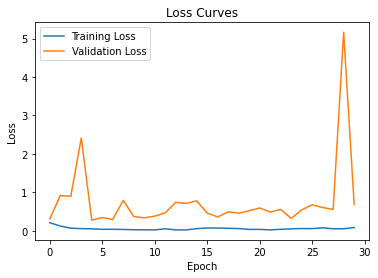

8/8 [==============================] - 1s 95ms/step - loss: 0.6795 - accuracy: 0.8164
Mean accuracy: 0.7109375
40/40 [==============================] - 4s 94ms/step - loss: 0.2503 - accuracy: 0.9195
Training accuracy: 0.9195312261581421
13/13 [==============================] - 2s 131ms/step - loss: 3.3197 - accuracy: 0.4775
Testing accuracy: 0.47749999165534973


In [16]:
# Creating the fourth model:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential

resnet = ResNet50(include_top=False, input_shape=(200, 200, 3))

# Creating the Sequential model
model = Sequential()

# Adding the ResNet50 layers
model.add(resnet)

# Adding the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 


# Importing the KFold class from sklearn
from sklearn.model_selection import KFold

# Create a KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)

# Initialize a list to store the accuracies for each fold
accuracies = []

# Loop through the folds
for train_index, test_index in kfold.split(x_train):
    # Get the training and test data for this fold
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Train the model on the training data
    # Train the model on the training data
    history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=64, validation_data=(x_test_fold, y_test_fold))

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test_fold, y_test_fold)
    print('Fold test accuracy:', test_acc)

    # Plot the training and validation loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

    # Evaluate the model on the test data
    _, accuracy = model.evaluate(x_test_fold, y_test_fold)

    # Store the accuracy
    accuracies.append(accuracy)

# Calculate the mean accuracy across all the folds
mean_accuracy = np.mean(accuracies)
print('Mean accuracy:', mean_accuracy)

# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc)

#Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Testing accuracy:', test_acc)


In [17]:
test_loss, test_acc = model.evaluate(x_test_fold, y_test_fold)
print('Fold test accuracy:', test_acc)

8/8 [==============================] - 1s 93ms/step - loss: 0.6795 - accuracy: 0.8164
Fold test accuracy: 0.81640625


In [18]:
mean_accuracy = np.mean(accuracies)
print('Mean accuracy:', mean_accuracy)

Mean accuracy: 0.7109375


### Model 4 Visualization:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               12845184  
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36,433,025
Trainable params: 36,379,905
Non-trainable params: 53,120
_________________________________________________________________


13/13 [==============================] - 2s 90ms/step


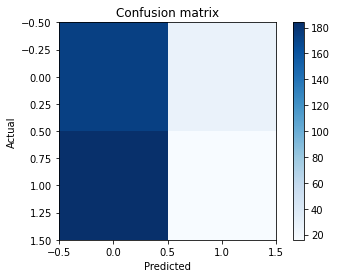

In [ ]:
from sklearn.metrics import confusion_matrix

# get the predicted labels for the test set
y_pred = model.predict(x_test).round()

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

# API Using Gradio Library for model 3: 

In [ ]:
#pip install gradio

In [ ]:
import gradio as gr

# Define the prediction function
def predict_cat_or_dog(image):
    # Preprocess the image and make a prediction using your model
    image = image / 255.0
    model = keras.models.load_model("pertained_model.h5")
    prediction = model.predict(image)
    
    label = "Cat" if prediction > 0.5 else "Dog"
    return label

# Create the input and output components
input_image = gr.inputs.Image()
output_label = gr.outputs.Label()

# Create the interface
interface = gr.Interface(fn=predict_cat_or_dog, inputs=input_image, outputs=output_label, title="Cat or Dog Classifier")

# Display the interface
interface.launch()


/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>